In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
import hist
import matplotlib as mpl
import pandas as pd
import os

In [2]:
# Task 0: Plot each of the branches listed above
file = uproot.open("/Users/deep/Downloads/egps_upstreamtagger_8_1_gev.root")
file.keys()

['LDMX_Events;4', 'LDMX_Events;3', 'LDMX_Run;1']

In [3]:
tree_name="LDMX_Events"
file['LDMX_Events;4'].keys()

['SimParticles_electron',
 'SimParticles_electron/SimParticles_electron.first',
 'SimParticles_electron/SimParticles_electron.second.energy_',
 'SimParticles_electron/SimParticles_electron.second.pdgID_',
 'SimParticles_electron/SimParticles_electron.second.genStatus_',
 'SimParticles_electron/SimParticles_electron.second.time_',
 'SimParticles_electron/SimParticles_electron.second.x_',
 'SimParticles_electron/SimParticles_electron.second.y_',
 'SimParticles_electron/SimParticles_electron.second.z_',
 'SimParticles_electron/SimParticles_electron.second.endX_',
 'SimParticles_electron/SimParticles_electron.second.endY_',
 'SimParticles_electron/SimParticles_electron.second.endZ_',
 'SimParticles_electron/SimParticles_electron.second.px_',
 'SimParticles_electron/SimParticles_electron.second.py_',
 'SimParticles_electron/SimParticles_electron.second.pz_',
 'SimParticles_electron/SimParticles_electron.second.endpx_',
 'SimParticles_electron/SimParticles_electron.second.endpy_',
 'SimParti

In [4]:
# 1 Truth_target_energy

In [5]:
branch_name="TargetScoringPlaneHits_electron.energy_"
data = file[tree_name][branch_name].array()
# Retrieve the first element (1)
truth_target_energy = ak.firsts(data)
first_elem = [] # Initialize an empty list to store the first elements
for elem in data:
    first_elem.append(elem[0]) #Append the first element of each event to the list
#print (first_elem) # Print the list of first elements

In [6]:
energy = first_elem
energy = ak.ravel(energy)
truth_target_energy = energy
# energy is in MeV, we divide by 1e3 we want to plot in GeV
energy_to_plot = energy/1e3
# printing sorted out "energy_to_plot" gives a range of the values in the x-axis)
print(np.sort(energy_to_plot))

[0.00352, 0.00489, 0.0118, 0.0246, 0.0257, 0.0328, ..., 7.99, 8, 8, 8, 8, 8]


Number of bins: 20


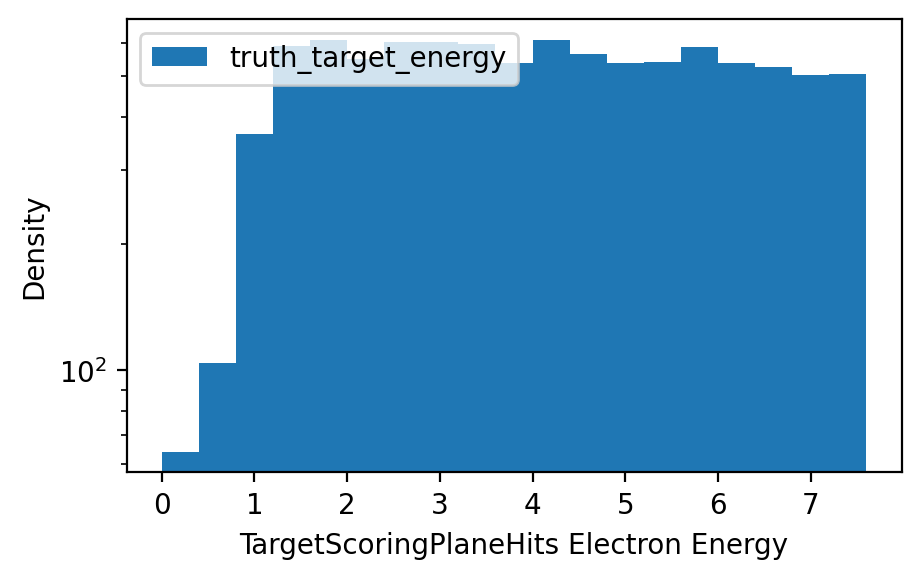

In [7]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
# we define bins as a range from 0 to 8(range from sorted "energy_to_plot") with 0.4(20 bins) bin width
bins = np.arange(0, 8, 0.4)
#steps should be less than stop. The jumps that it takes when plotting the data
print(f"Number of bins: {len(bins)}")
ax.hist(energy_to_plot, label='truth_target_energy', bins=bins)
ax.set_xlabel('TargetScoringPlaneHits Electron Energy')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [8]:
# 2 Truth_target_position_z

In [9]:
branch_name="TargetScoringPlaneHits_electron.z_"
data = file[tree_name][branch_name].array()
truth_target_position_z = ak.firsts(data)
z_axis_electron = ak.ravel(truth_target_position_z)
print (np.sort(z_axis_electron))

[0.177, 0.177, 0.177, 0.177, 0.177, ..., 0.177, 0.177, 0.177, 0.177, 0.177]


Number of bins: 20


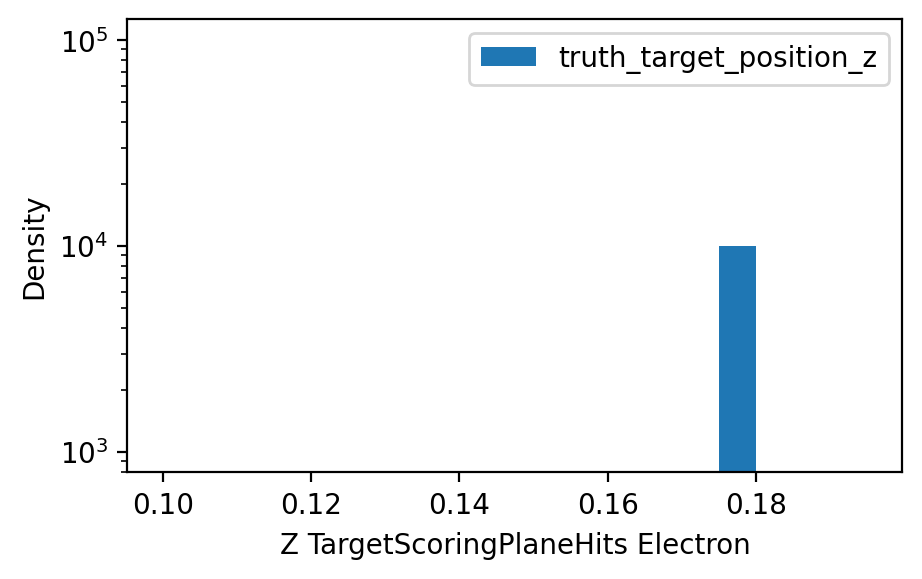

In [10]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
# we define bins as a range from 0.1 to 0.2(range from sorted "z_axis_electron" with 0.005 bin width(20 bins)
#steps should be less than stop. The jumps that it takes when plotting the data
print(f"Number of bins: {len(bins)}")
ax.hist(z_axis_electron, label='truth_target_position_z',bins = np.arange(0.1, 0.2, 0.005))
ax.set_xlabel('Z TargetScoringPlaneHits Electron')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [11]:
# 3 truth_ecal_energy

In [12]:
branch_name="EcalScoringPlaneHits_electron.energy_"
data = file[tree_name][branch_name].array()
truth_ecal_energy = ak.firsts(data) 
energy = data[:,0] #retrieving first value in 2D-array
flat_data = ak.ravel(energy)
print  (np.sort(flat_data))

[0.111, 0.529, 2.11, 15.5, 24.2, ..., 7.99e+03, 7.99e+03, 8e+03, 8e+03, 8e+03]


In [13]:
h = hist.Hist(
    hist.axis.Regular(20, 0, 10, name = "plot_truth_ecal_energy") 
)
h.fill(plot_truth_ecal_energy=flat_data/1e3) # Energy in Gev

Hist(Regular(20, 0, 10, name='plot_truth_ecal_energy'), storage=Double()) # Sum: 10000.0

In [14]:
# 4 truth_ecal_position_z

In [15]:
branch_name = "EcalScoringPlaneHits_electron.z_"
data = file[tree_name][branch_name].array()
truth_ecal_position_z = ak.firsts(data)
first_element= [elem[0] for elem in data]
z_ecal_position = ak.ravel(first_element)
print(np.sort(first_element))

[239.9985 239.9985 239.9985 ... 239.9985 239.9985 239.9985]


Number of bins: 20


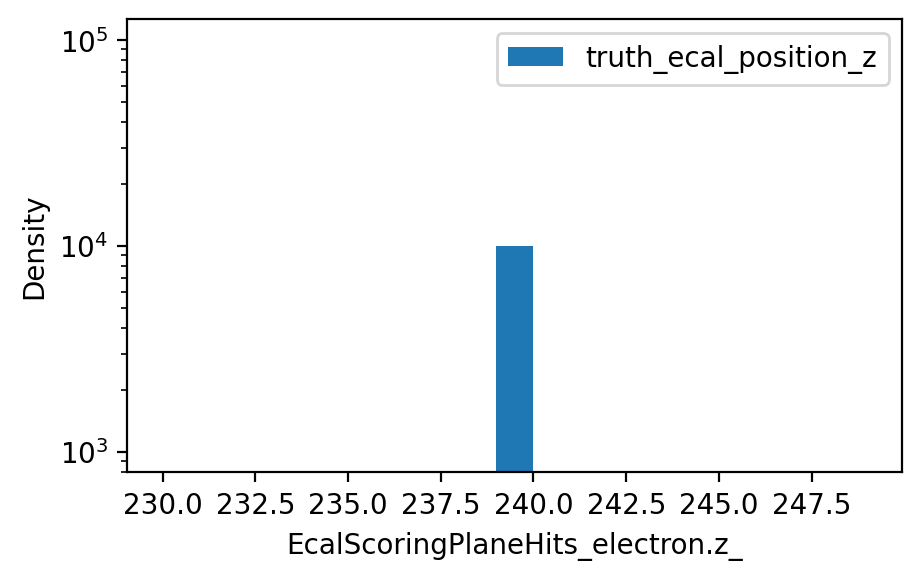

In [16]:
fig, ax = plt.subplots(figsize = (5, 3), dpi = 200)
print(f"Number of bins: {len(bins)}")
ax.hist(z_ecal_position, label='truth_ecal_position_z', bins = np.arange(230, 250, 1))
ax.set_xlabel('EcalScoringPlaneHits_electron.z_')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [17]:
# 5 reco_ecal_energy 

In [18]:
branch_name = "EcalRecHits_electron.energy_"
data = file[tree_name][branch_name].array()
reco_ecal_energy = data
data = ak.ravel(reco_ecal_energy)
print (np.sort(data))

[0.392, 0.392, 0.392, 0.392, 0.392, ..., 1.31e+03, 1.57e+03, 1.75e+03, 1.85e+03]


In [19]:
h = hist.Hist(
    hist.axis.Regular(100, 0, 2000, name = "reco_ecal_energy")
)
h.fill(reco_ecal_energy = data)

Hist(Regular(100, 0, 2000, name='reco_ecal_energy'), storage=Double()) # Sum: 886076.0

In [20]:
# 6 Ecal Clusters energy

In [21]:
branch_name = "PFEcalClusters_electron.energy_" 
data = file[tree_name][branch_name].array()
cluster_ecal_energy = ak.firsts(data)
data = ak.ravel(cluster_ecal_energy)
print (np.sort(data))

[627, 630, 632, 654, 660, ..., 9.82e+03, 9.89e+03, 1e+04, 1.02e+04, 1.02e+04]


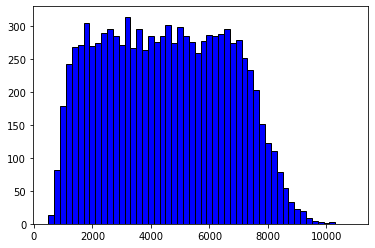

In [22]:
plt.hist(data, bins = np.arange(500, 11000, 200), color = 'blue', edgecolor = 'black')
plt.xlabel = "Ecal Clusters energy"
plt.ylabel = "frequency"
plt.title = "plot_cluster_ecal_energy"
plt.show()

In [23]:
# cluster_ecal_position_z

In [24]:
branch_name = "PFEcalClusters_electron.centroidZ_"
data = file[tree_name][branch_name].array()
cluster_ecal_position_z = ak.firsts(data)
data = ak.ravel(data)
print (np.sort(data))

[248, 248, 248, 248, 248, 248, 248, 248, ..., 664, 664, 700, 713, 736, 749, 749]


In [25]:
# plots for the entire 2d array 
h = hist.Hist(
    hist.axis.Regular(20, 200, 800, name = "twoD_cluster_ecal_position_z")
)
h.fill(twoD_cluster_ecal_position_z = data)

Hist(Regular(20, 200, 800, name='twoD_cluster_ecal_position_z'), storage=Double()) # Sum: 24513.0

In [26]:
# for first element
cluster_ecal_position_z = ak.ravel(cluster_ecal_position_z)
print(np.sort(cluster_ecal_position_z))

[302, 305, 307, 307, 310, 310, 310, 311, ..., 433, 433, 433, 434, 437, 445, 451]


 Number of bins: 20


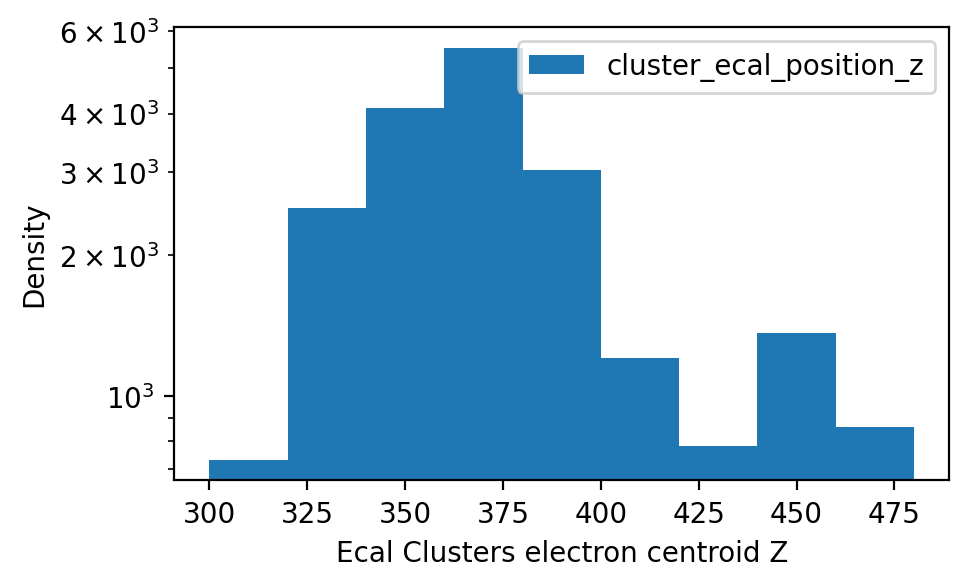

In [27]:
fig, ax = plt.subplots(figsize=(5,3), dpi = 200)
print (f" Number of bins: {len(bins)}")
ax.hist (data, label = 'cluster_ecal_position_z', bins = np.arange(300, 500, 20))
ax.set_xlabel ('Ecal Clusters electron centroid Z')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [28]:
# Task 1 : Plot residual energy

In [29]:
print (f" Length of truth_ecal: {len(truth_ecal_energy)} and length of cluster_ecal: {len(cluster_ecal_energy)}")

 Length of truth_ecal: 10000 and length of cluster_ecal: 10000


In [30]:
truth_ecal_energy = np.array(truth_ecal_energy)
cluster_ecal_energy = np.array(cluster_ecal_energy)

energy_residual = truth_ecal_energy - cluster_ecal_energy
print (energy_residual)

[-1536.35327148  -307.25537109  -119.63964844 ...   110.7232666
  -451.65966797    84.6875    ]


In [31]:
bool_1000_to_3000 = (truth_ecal_energy >= 1000) & (truth_ecal_energy <= 3000)
bool_3000_to_5000 = (truth_ecal_energy >= 3000) & (truth_ecal_energy <= 5000)
bool_5000_to_7000 = (truth_ecal_energy >= 5000) & (truth_ecal_energy <= 7000)
bool_7000_to_8000 = (truth_ecal_energy >= 7000) & (truth_ecal_energy <= 8000)

In [32]:
first_interval = energy_residual[bool_1000_to_3000]
second_interval = energy_residual[bool_3000_to_5000]
third_interval = energy_residual[bool_5000_to_7000]
fourth_interval = energy_residual[bool_7000_to_8000]

In [33]:
# Plot first_interval

In [34]:
print(np.sort(first_interval))

[-7439.63195801 -7229.19311523 -6958.32800293 ...  1031.92333984
  1081.06311035  1088.75976562]


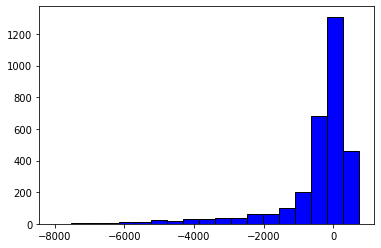

In [35]:
plt.hist(first_interval, bins = np.arange(-8000, 1200, 460), color = 'blue', edgecolor = 'black')
plt.xlabel = "interval from -8000 to 1200  "
plt.ylabel = "frequency"
plt.title = "first_interval"
plt.show()

In [36]:
# Plot second_interval

In [37]:
print(np.sort(second_interval))

[-6130.44506836 -5885.55981445 -5502.00561523 ...  1552.09887695
  1602.75683594  1693.6262207 ]


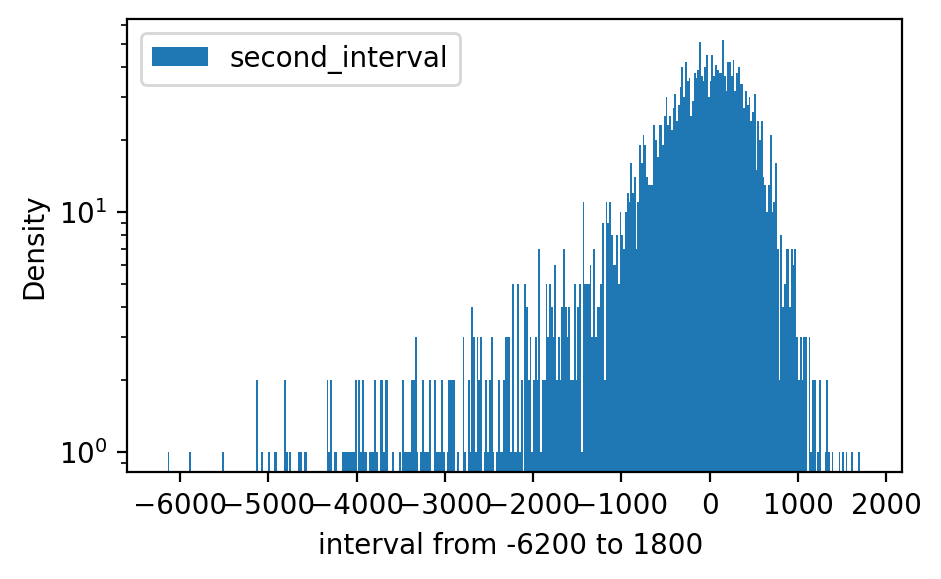

In [38]:
fig, ax = plt.subplots(figsize=(5,3), dpi = 200)
ax.hist (second_interval, label = 'second_interval', bins = np.arange(-6200, 1800, 20))
ax.set_xlabel ('interval from -6200 to 1800 ')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [39]:
# Plot third_interval

In [40]:
print(np.sort(third_interval))

[-4526.67724609 -4224.56201172 -4039.72119141 ...  1691.78466797
  1697.75927734  1928.57617188]


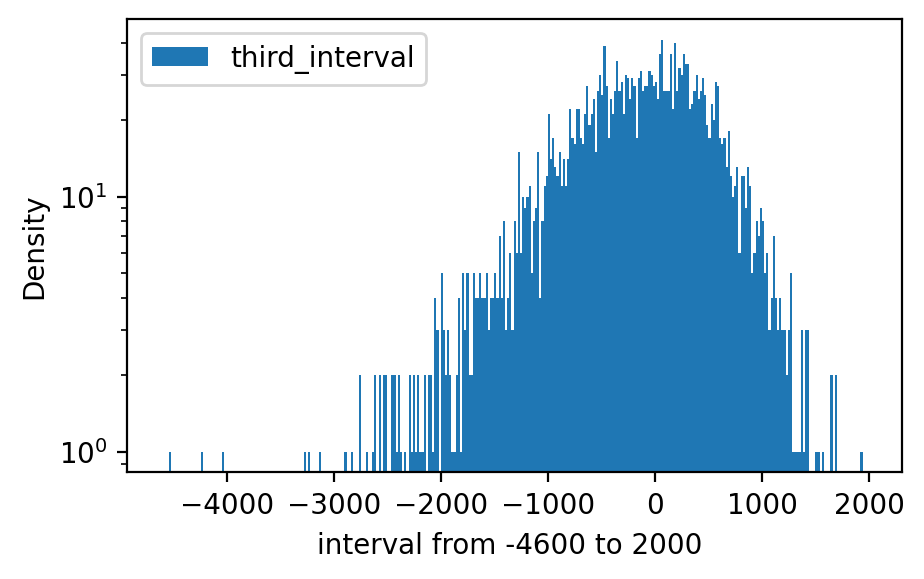

In [41]:
fig, ax = plt.subplots(figsize=(5,3), dpi = 200)
ax.hist (third_interval, label = 'third_interval', bins = np.arange(-4600, 2000, 20))
ax.set_xlabel ('interval from -4600 to 2000 ')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [42]:
# Plot fourth_interval

In [43]:
print(np.sort(fourth_interval))

[-2416.05664062 -2394.19873047 -2345.83642578 ...  1822.74560547
  1902.27099609  3222.97851562]


In [44]:
h = hist.Hist(
    hist.axis.Regular(20, -2500, 3400, name = "fourth_interval")
)
h.fill(fourth_interval = fourth_interval)

Hist(Regular(20, -2500, 3400, name='fourth_interval'), storage=Double()) # Sum: 1089.0

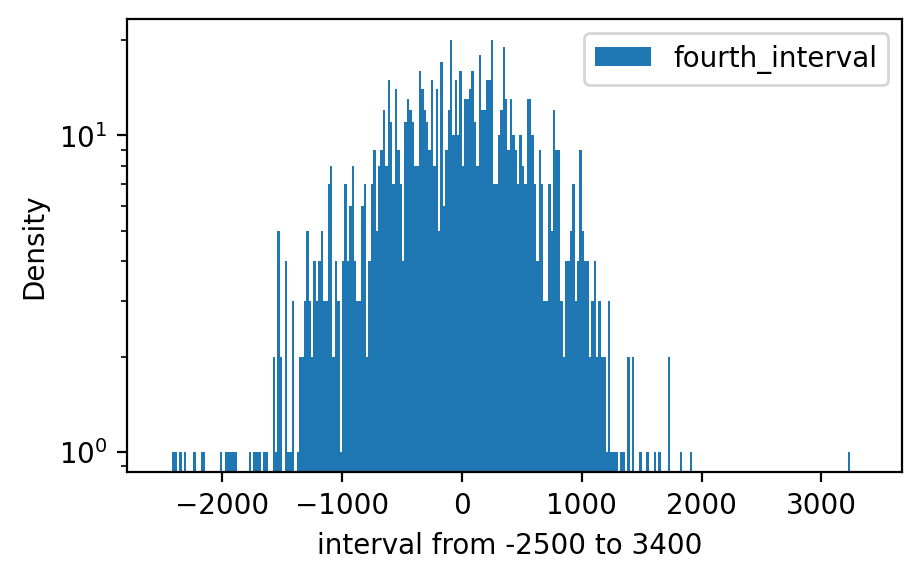

In [45]:
# plotting as second Histogram, since this isn't very informative 
fig, ax = plt.subplots(figsize=(5,3), dpi = 200)
ax.hist (fourth_interval, label = 'fourth_interval', bins = np.arange(-2500, 3400, 20))
ax.set_xlabel ('interval from -2500 to 3400 ')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [46]:
# Task 2: Study energy resolution for different ranges of energy

In [47]:
first_deviation = np.std(first_interval)/2000
second_deviation = np.std(second_interval)/4000
third_deviation = np.std(third_interval)/6000
fourth_deviation = np.std(fourth_interval)/7500

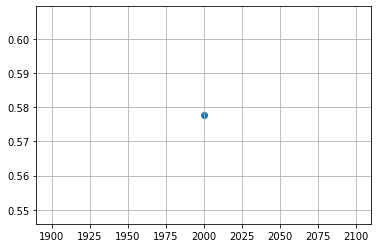

In [48]:
# Define the mean_energy_value for first_deviation range
mean_energy_value = 2000
# Calculate the standard deviation and resolution for the first range
std_deviation = np.std(first_interval)
resolution = std_deviation / mean_energy_value
# Create a scatter plot for the first range
plt.scatter(mean_energy_value, resolution)
plt.xlabel= "Mean Energy Value (MeV)"
plt.ylabel = "Resolution"
plt.title = "Energy Resolution vs. Mean Energy Value (Range: [1000 - 3000] MeV)"
plt.grid(True)
plt.show()


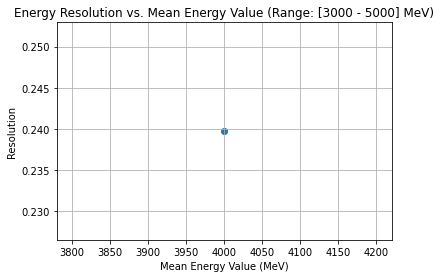

In [49]:
# Define the mean_energy_value for second_deviation range
mean_energy_value = 4000
# Calculate the stdev and res for the second range
std_deviation = np.std(second_interval)
resolution = std_deviation / mean_energy_value
# Create a figure and axis (ax)
fig, ax = plt.subplots()
# Scatter plot for the second range
ax.scatter(mean_energy_value, resolution)
ax.set_xlabel("Mean Energy Value (MeV)")  # Set x-label using ax 
ax.set_ylabel("Resolution")  # Set y-label using ax
ax.set_title("Energy Resolution vs. Mean Energy Value (Range: [3000 - 5000] MeV)")
ax.grid(True)
plt.show()

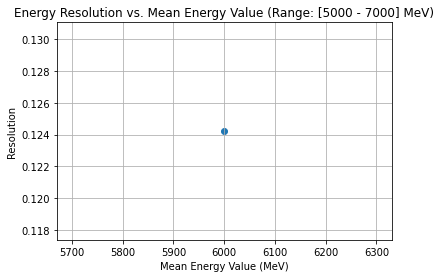

In [50]:
# Define the mean_energy_value for third_interval range
mean_energy_value = 6000

# Calculate the stde and res for the second range
std_deviation = np.std(third_interval)
resolution = std_deviation / mean_energy_value
# Create a figure and axis (ax)
fig, ax = plt.subplots()
# Scatter plot for the second range
ax.scatter(mean_energy_value, resolution)
ax.set_xlabel("Mean Energy Value (MeV)")  # Set x-label using ax
ax.set_ylabel("Resolution")  # Set y-label using ax
ax.set_title("Energy Resolution vs. Mean Energy Value (Range: [5000 - 7000] MeV)")
ax.grid(True)
plt.show()

In [51]:
# Define the mean_energy_value for fourth_interval range
mean_energy_value = 7500
# Calculate the stde and res for the fourth range
std_deviation = np.std(fourth_interval)
resolution = std_deviation / mean_energy_value
ax.scatter(mean_energy_value, resolution)
ax.set_xlabel("Mean Energy Value (MeV)")  
ax.set_ylabel("Resolution")
ax.set_title("Energy Resolution vs. Mean Energy Value (Range: [7000 - 8000] MeV)")
ax.grid(True)
plt.show()

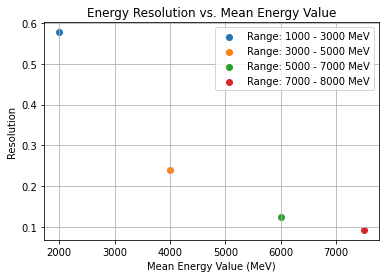

In [52]:
# turn the residual energy ranges to an array
residual_energy_ranges = [first_interval, second_interval, third_interval, fourth_interval]
# Define the mean_energy_values for each range
mean_energy_values = [2000, 4000, 6000, 7500]
# Define the energy ranges corresponding to each interval
energy_ranges = [(1000, 3000), (3000, 5000), (5000, 7000), (7000, 8000)]
fig, ax = plt.subplots()
# Iterate through the ranges and plot them on the same axes
for residual_energy, mean_energy_value, energy_range in zip(residual_energy_ranges, mean_energy_values, energy_ranges):
    std_deviation = np.std(residual_energy)
    resolution = std_deviation / mean_energy_value
    label = f"Range: {energy_range[0]} - {energy_range[1]} MeV"
    ax.scatter(mean_energy_value, resolution, label=label)
# Set labels and title
ax.set_xlabel("Mean Energy Value (MeV)")
ax.set_ylabel("Resolution")
ax.set_title("Energy Resolution vs. Mean Energy Value")
# Add a legend for different energy ranges
ax.legend()
plt.grid(True)
plt.show()

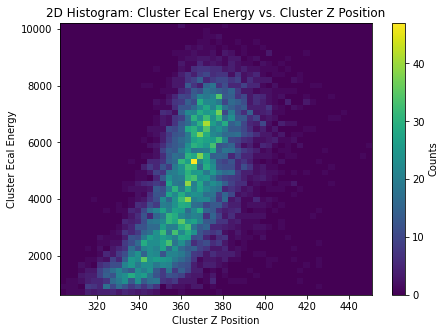

In [55]:
# Convert cluster_ecal_position_z and cluster_ecal_energy to NumPy arrays
cluster_ecal_position_z = np.array(cluster_ecal_position_z)
cluster_ecal_energy = np.array(cluster_ecal_energy)
# Create a figure and axis (ax)
fig, ax = plt.subplots(figsize=(7, 5))
# Create 2D histogram of cluster_ecal_energy vs cluster_ecal_position_z
hist = ax.hist2d(cluster_ecal_position_z, cluster_ecal_energy, bins=(50, 50), cmap='viridis')
plt.colorbar(hist[3], ax=ax, label='Counts')
# Set labels and title
ax.set_xlabel('Cluster Z Position')
ax.set_ylabel('Cluster Ecal Energy')
ax.set_title('2D Histogram: Cluster Ecal Energy vs. Cluster Z Position')
plt.show()

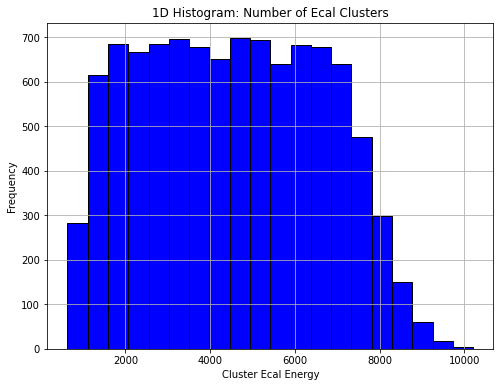

In [58]:
# Convert cluster_ecal_energy to a NumPy array
cluster_ecal_energy = np.array(cluster_ecal_energy)
fig, ax = plt.subplots(figsize=(8, 6))
# Create a 1D histogram of the number of ecal clusters
hist = ax.hist(cluster_ecal_energy, bins=20,  color = 'blue', edgecolor = 'black')
ax.set_xlabel('Cluster Ecal Energy')
ax.set_ylabel('Frequency')
ax.set_title('1D Histogram: Number of Ecal Clusters')
ax.grid(True)
plt.show()